In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1

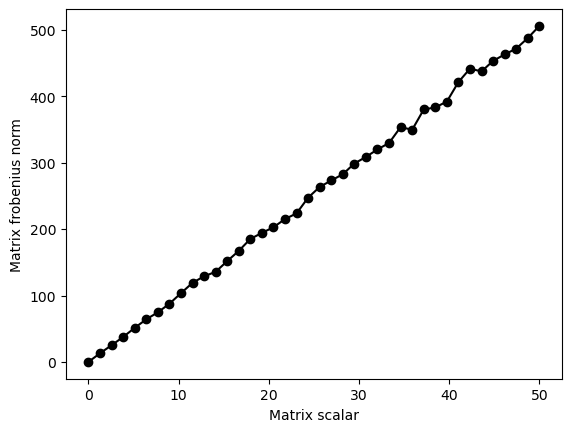

In [2]:
scalars = np.linspace(0, 50, 40)
n = 10
norms = np.zeros((len(scalars), n))

for i in range(len(scalars)):
    for j in range(n):
        A = np.random.randn(10,10) * scalars[i]
        norms[i,j] = np.linalg.norm(A, "fro")

plt.plot(scalars, np.mean(norms, axis = 1), "ko-")
plt.xlabel("Matrix scalar")
plt.ylabel("Matrix frobenius norm")
plt.savefig('Figure_06_07.png',dpi=300)
plt.show()

# Exercise 2

In [3]:
def frob_dist(A, B):
    return np.sqrt(np.sum((A - B)**2))

N = 6
A = np.random.randn(N,N)
B = np.random.randn(N,N)

reps = 0
s = 1
while frob_dist(A*s, B*s) > 1:
    s *= 0.9
    reps += 1
    
print(f"Number of iterations: {reps}")
print(f"Value of scalar: {s:.3f}")
print(f"Final Euclidean Distance: {frob_dist(A*s, B*s):.3f}")

Number of iterations: 22
Value of scalar: 0.098
Final Euclidean Distance: 0.936


# Exercise 3

In [4]:
np.random.seed(0)
N = 6
A = np.random.randn(N,N)
B = np.random.randn(N,N)

m1 = np.sqrt(np.sum(A**2))
m2 = np.sqrt(np.sum(np.diag(A.T @ A)))
m3 = np.sqrt(np.sum(np.diag(A @ A.T)))
print(np.isclose(m1, m2), np.isclose(m1, m3))

True True


# Exercise 4

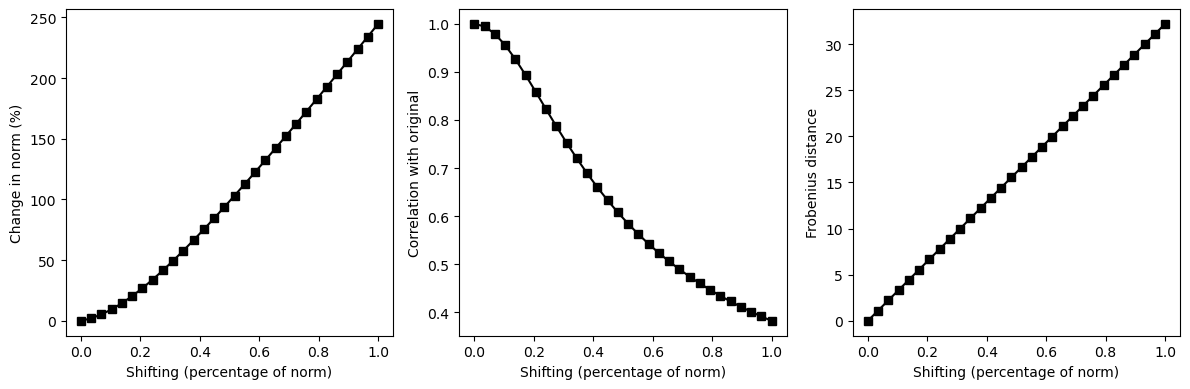

In [5]:
N = 10
shift = np.linspace(0, 1, 30)
A = np.random.randn(100).reshape(10,10)
norm_A = np.linalg.norm(A, "fro")

shift_results = np.zeros((len(shift), 3))
result_names = ["Change in norm (%)", "Correlation with original", "Frobenius distance"]

for i in range(len(shift)):   
    # Shift matrix
    A_s = A + shift[i] * norm_A * np.eye(N)   
    # Recompute norm, find percentage change
    norm_s = np.linalg.norm(A_s, "fro")
    shift_results[i, 0] = 100 * (norm_s - norm_A) / norm_A    
    # Compute correlation
    shift_results[i, 1] = np.corrcoef(A.flatten(), A_s.flatten())[0, 1]    
    # Frobenius distance
    shift_results[i, 2] = frob_dist(A, A_s)

fig, ax = plt.subplots(1, 3, figsize = (12,4))
for i in range(shift_results.shape[1]):
    ax[i].plot(shift, shift_results[:,i], "ks-")
    ax[i].set_xlabel("Shifting (percentage of norm)")
    ax[i].set_ylabel(result_names[i])
    
plt.tight_layout()
plt.savefig('Figure_06_06.png',dpi=300)
plt.show()

# Exercise 5
- Note that randomly generated matrices are always full rank because there's basically zero chance of linear dependence
- To generate a matrix with rank r, produce a random (r,r) matrix
- To produce a matrix with rank r and size (m,n), multiply a (m,r) and a (r,n) sized matrix

In [6]:
m = 6
n = 5
r = 3

A = np.random.randn(m, r) @ np.random.randn(r, n)
print(np.linalg.matrix_rank(A))

3


# Exercise 6

In [7]:
# Summing two matrices can reduce the rank
A = np.diag([1,0,0,0,0])
B = np.diag([-1,0,0,0,0])
C = A + B

np.linalg.matrix_rank(A), np.linalg.matrix_rank(B), np.linalg.matrix_rank(C)

(1, 1, 0)

In [8]:
# Summed matrices can retain their original rank
A = np.diag([1,0,0,0,0])
B = np.zeros(A.shape)
B[0,1] = 10
C = A + B

np.linalg.matrix_rank(A), np.linalg.matrix_rank(B), np.linalg.matrix_rank(C)

(1, 1, 1)

In [9]:
# Summing matices can increase the rank
A = np.diag([1,0,0,0,0])
B = np.diag([0,1,0,0,0])
C = A + B

np.linalg.matrix_rank(A), np.linalg.matrix_rank(B), np.linalg.matrix_rank(C)

(1, 1, 2)

In [10]:
# Adding randomized matrices will usually yield the maximal rank
A = np.random.randn(5,1) @ np.random.randn(1,5)
B = np.random.randn(5,1) @ np.random.randn(1,5)
C = A + B

np.linalg.matrix_rank(A), np.linalg.matrix_rank(B), np.linalg.matrix_rank(C)

(1, 1, 2)

# Exercise 7

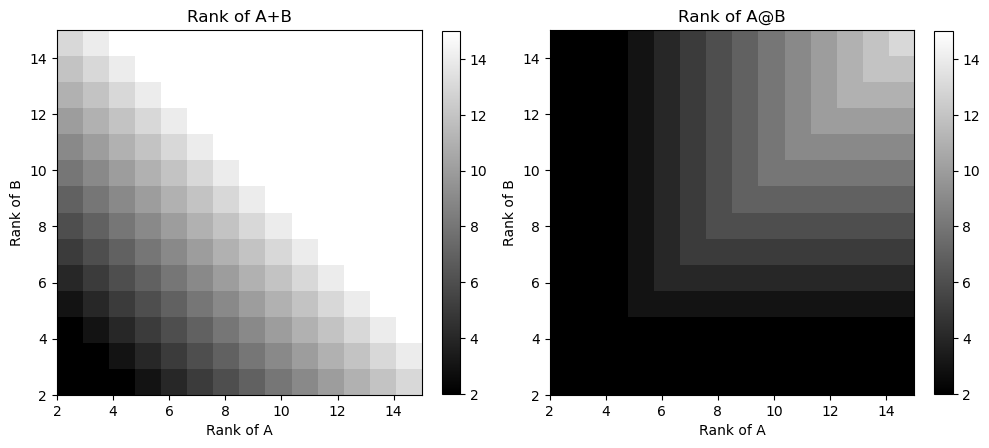

In [11]:
def generate(m, r):
    return np.random.randn(m, r) @ np.random.randn(r, m)

size = 20
r = range(2, 16)
ranks = np.zeros((len(r), len(r), 2))

for i in range(len(r)):
    for j in range(len(r)):
        summ = generate(size, i) + generate(size, j)
        prod = generate(size, i) @ generate(size, j)
        ranks[i, j, 0] = np.linalg.matrix_rank(summ)
        ranks[i, j, 1] = np.linalg.matrix_rank(prod)

fig, ax = plt.subplots(1, 2, figsize = (10,6))
s = "+@"

for i in range(2):
    h = ax[i].imshow(ranks[:,:,i], vmin = np.min(r), vmax = np.max(r),
                    origin = "lower", extent = (r[0], r[-1], r[0], r[-1]), cmap = "gray")
    fig.colorbar(h, ax = ax[i], fraction = 0.045)
    ax[i].set_xlabel("Rank of A")
    ax[i].set_ylabel("Rank of B")
    ax[i].set_title(f"Rank of A{s[i]}B")
    
plt.savefig('Figure_06_09.png',dpi=300)
plt.tight_layout()
plt.show()

# Exercise 8

In [12]:
A = generate(size, 5)
for i in [A, A.T, A @ A.T, A.T @ A]:
    print(np.linalg.matrix_rank(i))

5
5
5
5


# Exercise 9

In [13]:
A = np.random.randn(4, 3) @ np.random.randn(3, 3)
v = np.random.randn(4, 1)
A_1 = np.hstack((A,v))

def v_in_col_A(A, v):
    if A.shape[0] != v.shape[0]:
        raise Exception("Size mismatch")
    rank_A = np.linalg.matrix_rank(A)
    rank_Av = np.linalg.matrix_rank(np.hstack((A,v)))
    return rank_A == rank_Av

A = np.random.randn(4, 3)
v = np.random.randn(4, 1)
v_in_col_A(A,v)

False

# Exercise 10

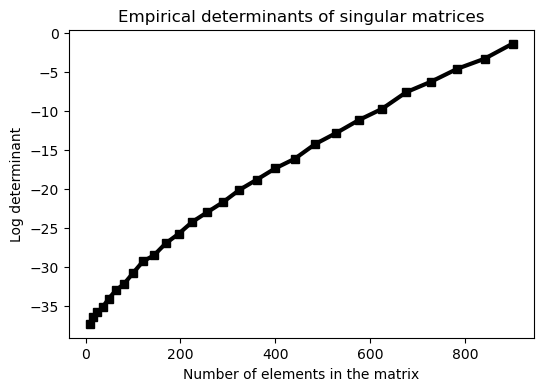

In [14]:
sizes = np.arange(3, 31)
reps = 100
dets = np.zeros((len(sizes),reps))

for i in range(len(sizes)):
    for j in range(reps):
        A = np.random.randn(sizes[i], sizes[i])
        # Copy column to make matrix singular
        A[:,0] = A[:,1]
        dets[i,j] = np.abs(np.linalg.det(A))

plt.figure(figsize = (6,4))
plt.plot(sizes**2, np.log(np.mean(dets, axis = 1)), "ks-", linewidth = 3)
plt.xlabel("Number of elements in the matrix")
plt.ylabel("Log determinant")
plt.title("Empirical determinants of singular matrices")
plt.savefig('Figure_06_10.png',dpi=300)
plt.show()